# 0. Name & Z-ID (5 pts)

Juviny Noriega

z1917876

assignment 8 



# 1. Maximum Natural Gas Use (25 pts)

In [10]:
import pandas as pd

data_file=pd.read_csv('http://faculty.cs.niu.edu/~dakoop/cs503-2024sp/a8/ny-county-energy.csv.gz')

# Load the dataset. Compute the county and year+month 
# which used the most natural gas (the data field display 
# name is "Total Consumption (T)" while the data_field is 
# "6_nat_consumption"). In your notebook, be clear about 
# which county, year, and month had the highest natural gas use.

nat_gas_filtered=data_file[(data_file['data_class'] == 'natural_gas') & (data_file['data_field'] == "6_nat_consumption") & (data_file['data_field_display_name'] == "Total Consumption (T)")]

grouped_data=nat_gas_filtered.groupby(['county_name','year','month'])

total_usage=grouped_data['value'].sum()


max_usage_row = total_usage.idxmax()
max_county, max_year, max_month = max_usage_row

print("County with the maximum natural gas usage:")
print("County:", max_county)
print("Year:", max_year)
print("Month:", max_month)




    





County with the maximum natural gas usage:
County: New York
Year: 2021
Month: 12


b. Maximum Per-Account Usage County in Dataset (15 pts)

In [11]:
grouped_data = nat_gas_filtered.groupby('county_name')

# Calculate the total natural gas usage and the total number of accounts for each county
total_usage = grouped_data['value'].sum()
total_accounts = grouped_data['number_of_accounts'].sum()

# Compute a derived column by dividing the total natural gas usage by the total number of accounts
natural_gas_per_account = total_usage / total_accounts



max_usage_per_account_county = natural_gas_per_account.idxmax()

print("County with the maximum natural gas usage per account:")


print("County:", max_usage_per_account_county)


County with the maximum natural gas usage per account:
County: Oswego


a. Bar Charts (15 pts)

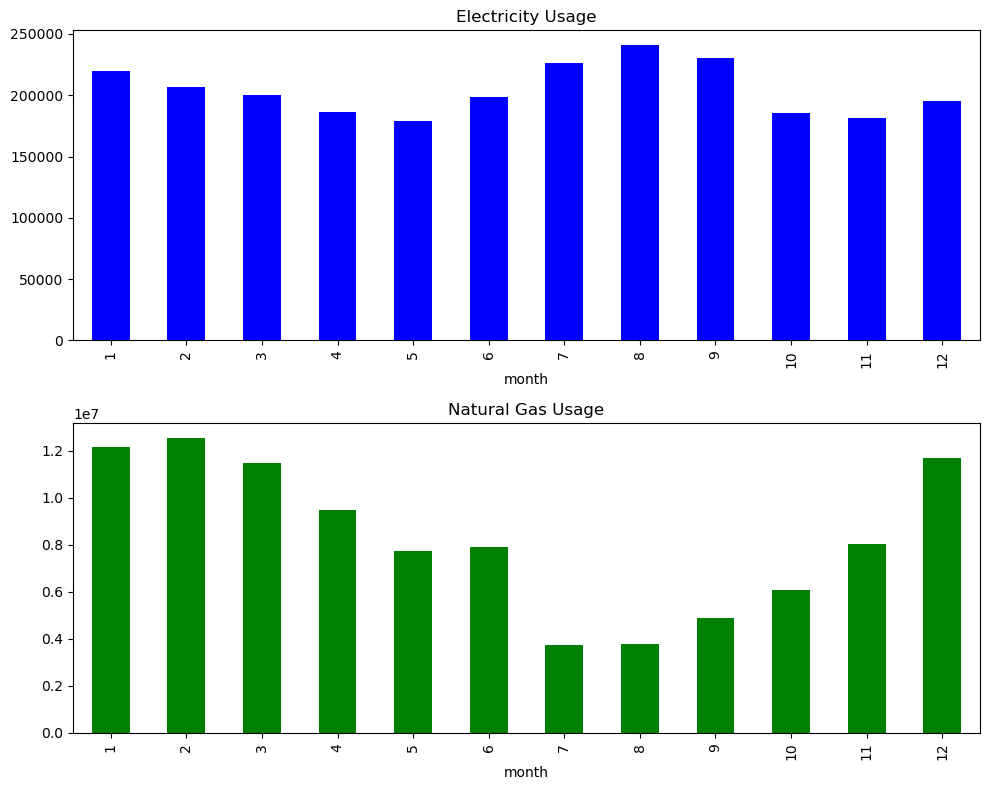

In [16]:

import matplotlib.pyplot as plt



# Filter the dataset for Total Consumption (T) for electricity and natural gas


electricity_data = data_file[(data_file['data_field_display_name'] == 'Total Consumption (T)') & 
                             (data_file['data_field'] == '3_nat_consumption')]


natural_gas_data = data_file[(data_file['data_field_display_name'] == 'Total Consumption (T)') & 
                             (data_file['data_field'] == '6_nat_consumption')]


electricity_monthly_mean = electricity_data.groupby('month')['value'].mean()

natural_gas_monthly_mean = natural_gas_data.groupby('month')['value'].mean()


fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot bar charts
electricity_monthly_mean.plot(kind='bar', ax=axes[0], color='blue', title='Electricity Usage')
natural_gas_monthly_mean.plot(kind='bar', ax=axes[1], color='green', title='Natural Gas Usage')

# Hide the legend
for ax in axes:
    ax.legend().set_visible(False)

plt.tight_layout()
plt.show()

b. Line Charts (15 pts)


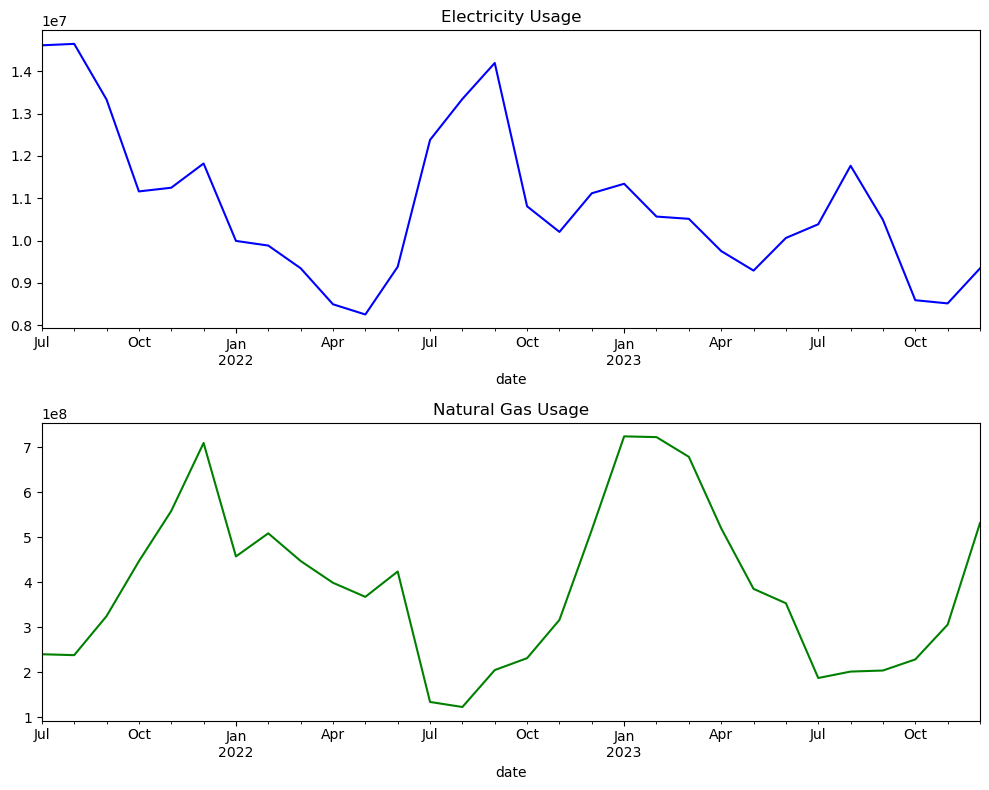

In [15]:
data_file['date'] = pd.to_datetime(data_file['year'].astype(str) + '-' + data_file['month'].astype(str))



# Filter the dataset for Total Consumption (T) for electricity and natural gas
electricity_data = data_file[(data_file['data_field_display_name'] == 'Total Consumption (T)') & 
                             
                             (data_file['data_field'] == '3_nat_consumption')]
natural_gas_data = data_file[(data_file['data_field_display_name'] == 'Total Consumption (T)') & 
                             (data_file['data_field'] == '6_nat_consumption')]

# Group by date and calculate the sum value
electricity_monthly_sum = electricity_data.groupby('date')['value'].sum()

natural_gas_monthly_sum = natural_gas_data.groupby('date')['value'].sum()

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

electricity_monthly_sum.plot(ax=axes[0], color='blue', title='Electricity Usage')

natural_gas_monthly_sum.plot(ax=axes[1], color='green', title='Natural Gas Usage')

# Hide the legend
for ax in axes:
    ax.legend().set_visible(False)

plt.tight_layout()
plt.show()


3. Counties By Month

a. Monthly Scatterplots (15 pts)

In [17]:
import altair as alt



data_2023 = data_file[data_file['year'] == 2023]

# Create a selection for highlighting


highlight = alt.selection(type='single', on='mouseover', fields=['county_name'])

# Create a scatterplot for each month


scatterplots = []
for month in range(1, 13):
    # Filter the data for the current month
    monthly_data = data_2023[data_2023['month'] == month]
    
    # Create the scatterplot for the current month
    scatterplot = alt.Chart(monthly_data).mark_circle().encode(
        x='electricity_usage',
        y='natural_gas_usage',
        
        tooltip=['county_name'],
        
        color=alt.condition(highlight, alt.value('red'), alt.value('steelblue')),
        size=alt.condition(highlight, alt.value(100), alt.value(30))
    ).properties(
        title=f'Month {month}'
    ).add_selection(
        highlight
    )
    
    scatterplots.append(scatterplot)

# Combine the scatterplots into a 4x3 layout


alt.vconcat(*[alt.hconcat(*scatterplots[i:i+3]) for i in range(0, 12, 3)])


ModuleNotFoundError: No module named 'altair'

In [14]:
import numpy as np
my_array = np.array([1, 2, 3, 4])


print("NumPy array:", my_array)


my_array[-1]=5


my_array[0:-1]

NumPy array: [1 2 3 4]


array([1, 2, 3])

In [20]:
my_tuple = ("apple", 3.14, 42)


print("Tuple:", my_tuple)





new_tuple=my_tuple[0:-1]


print (new_tuple)
print (my_tuple)

Tuple: ('apple', 3.14, 42)
('apple', 3.14)
('apple', 3.14, 42)


In [11]:
my_list = ["banana", 2, 3.5]
print("List:", my_list)



my_list[0]

List: ['banana', 2, 3.5]


'banana'

In [29]:
a = np.array([1,2,3])
b = np.array([4,5,6])

c = a + b

In [26]:
c = np.array([2,43,2])
c + a


array([ 3, 45,  5])

In [30]:
a = np.array([[1,2,3],[1,2,3]])
b = np.array([[6,4,3],[6,4,3]])
a + b

array([[7, 6, 6],
       [7, 6, 6]])

In [34]:
arr2 = np.array([[1.5,2,3,4],[5,6,7,8]])
arr2[0,0] 

1.5

In [37]:
arr1 = np.array([6, 7, 8, 0, 1]) 
new_arr=arr1[2:4]